In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.shape

(11162, 17)

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df = df[df["contact"] != "unknown"]

In [7]:
df["contact"].value_counts()

contact
cellular     8042
telephone     774
Name: count, dtype: int64

In [8]:
df = df[df["poutcome"] != "unknown"]
df = df[df["poutcome"] != "other"]

In [9]:
df["poutcome"].value_counts()

poutcome
failure    1222
success    1065
Name: count, dtype: int64

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
891,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
951,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,1091,2,150,1,success,yes
952,37,technician,married,secondary,no,5115,yes,no,cellular,17,nov,1210,2,171,4,failure,yes
953,45,entrepreneur,married,secondary,no,781,no,yes,cellular,17,nov,652,2,126,2,failure,yes
985,46,unemployed,divorced,secondary,no,3354,yes,no,cellular,19,nov,522,1,174,1,success,yes


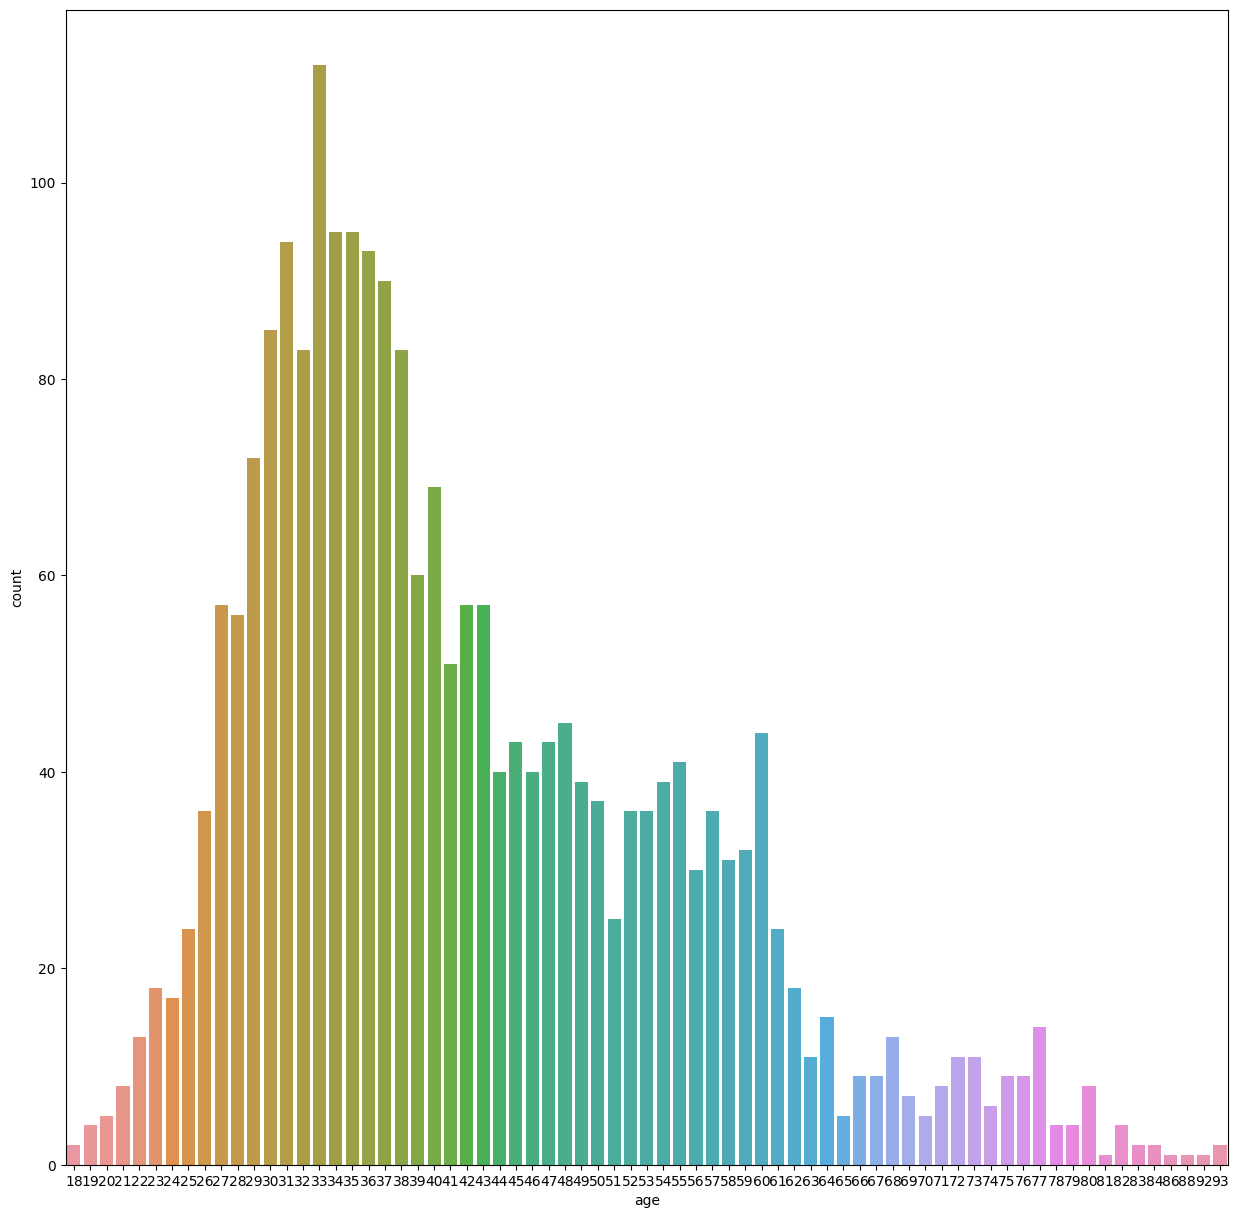

In [11]:
plt.figure(figsize=(15,15))
sns.countplot(x="age",data=df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


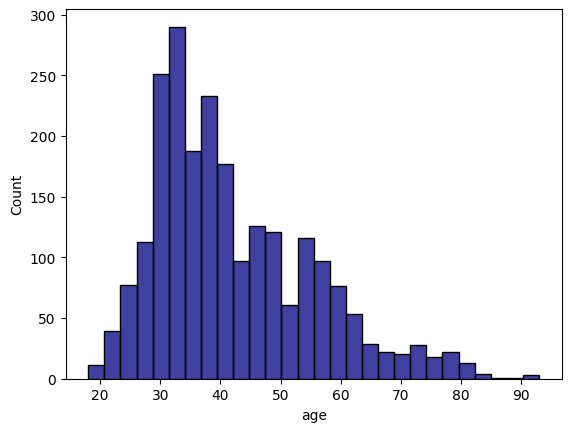

In [12]:
sns.histplot(data=df, x="age",color="navy")
plt.show()

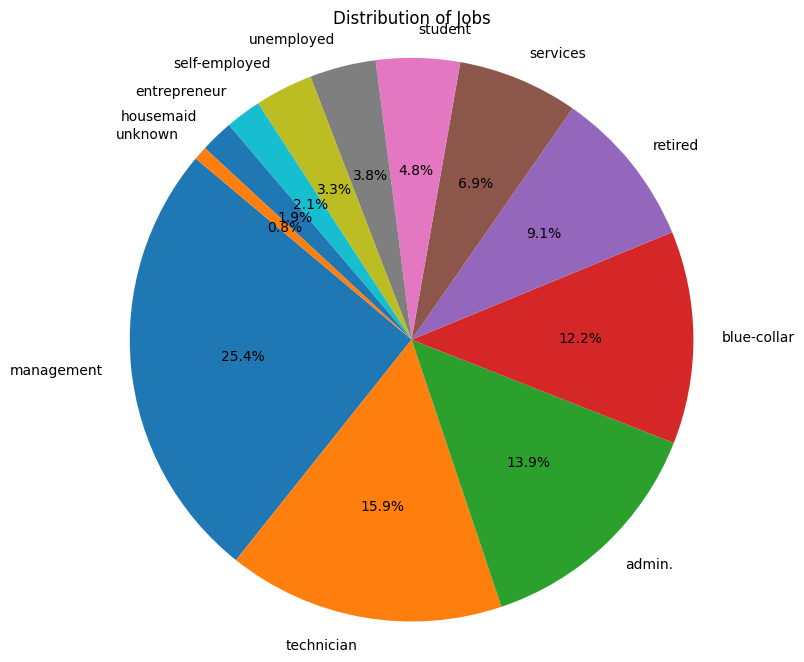

In [13]:
job_counts = df['job'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Jobs')
plt.axis('equal')  
plt.show()

In [14]:
df["marital"].value_counts()

marital
married     1299
single       772
divorced     216
Name: count, dtype: int64

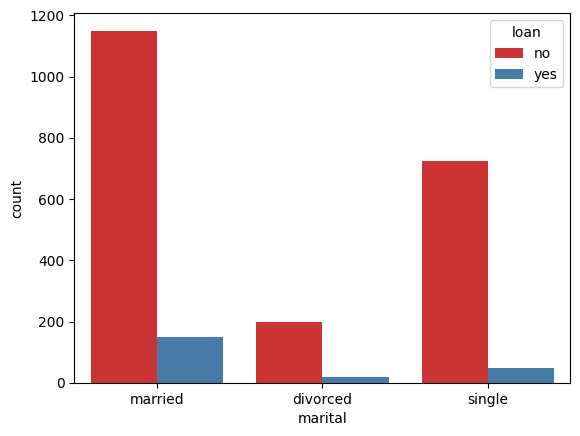

In [15]:
sns.countplot(x="marital",data=df,palette="Set1",hue="loan")
plt.show()

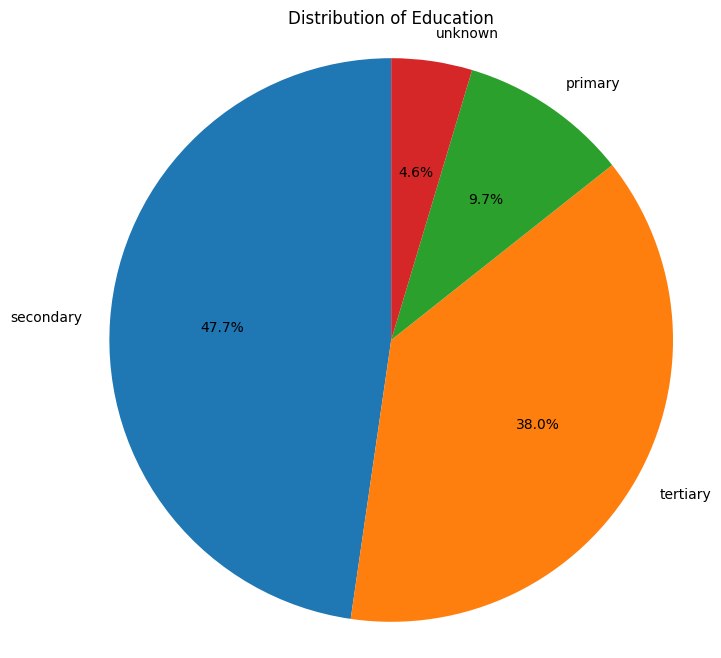

In [16]:
ed_counts = df['education'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(ed_counts, labels=ed_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Education')
plt.axis('equal')  
plt.show()

In [17]:
df["default"].value_counts()

default
no     2279
yes       8
Name: count, dtype: int64

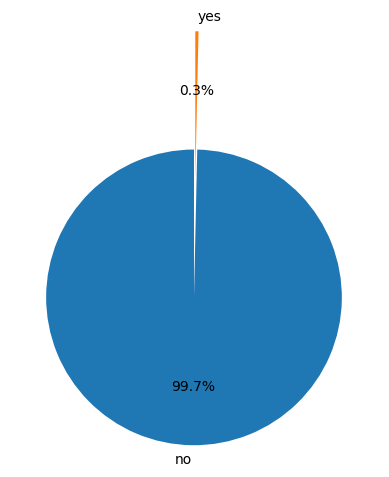

In [18]:
myexplode = [0.5, 0.3]
d=df["default"].value_counts()
plt.pie(d, labels=d.index, autopct='%1.1f%%', startangle=90,explode=myexplode)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


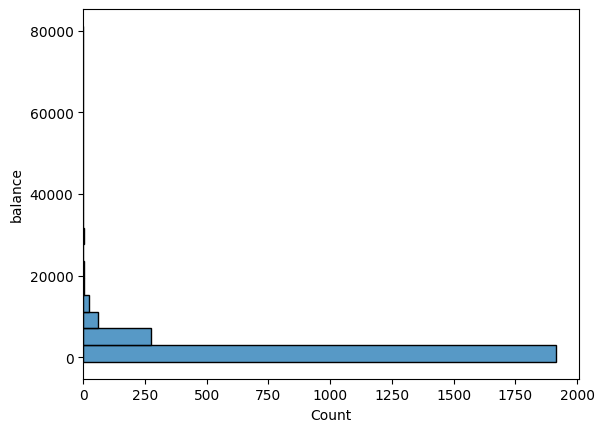

In [19]:
sns.histplot(data=df, y="balance",bins=20)
plt.show()

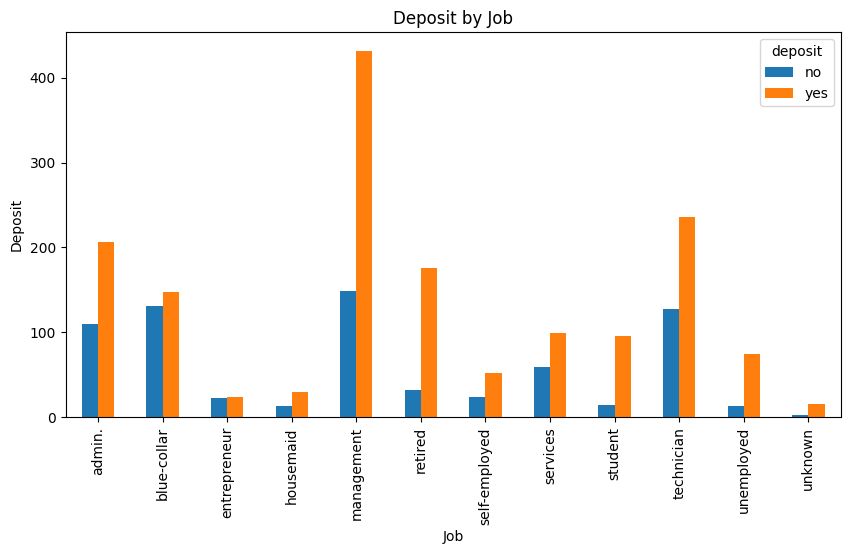

In [20]:
df.groupby(["job"])['deposit'].value_counts().unstack().plot(kind='bar',figsize=(10,5))
plt.title("Deposit by Job")
plt.xlabel("Job")
plt.ylabel("Deposit")
plt.show()

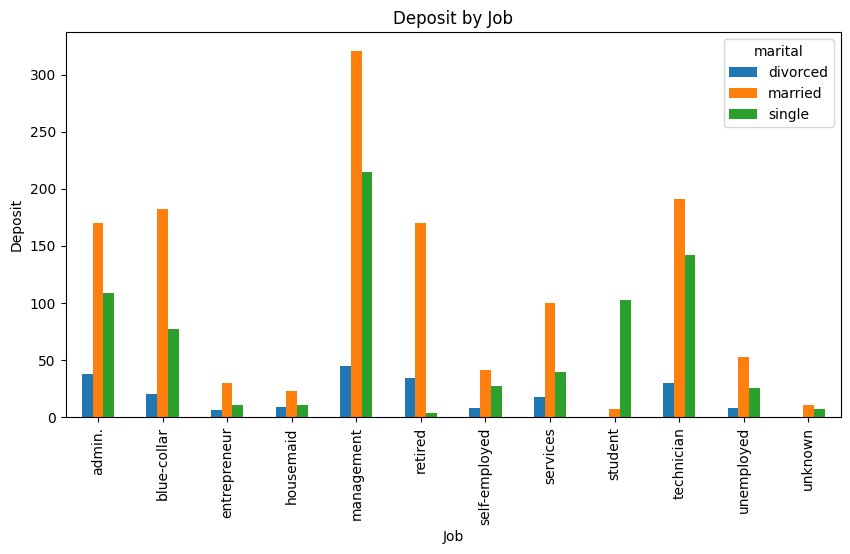

In [21]:
df.groupby(["job"])['marital'].value_counts().unstack().plot(kind='bar',figsize=(10,5))
plt.title("Deposit by Job")
plt.xlabel("Job")
plt.ylabel("Deposit")
plt.show()

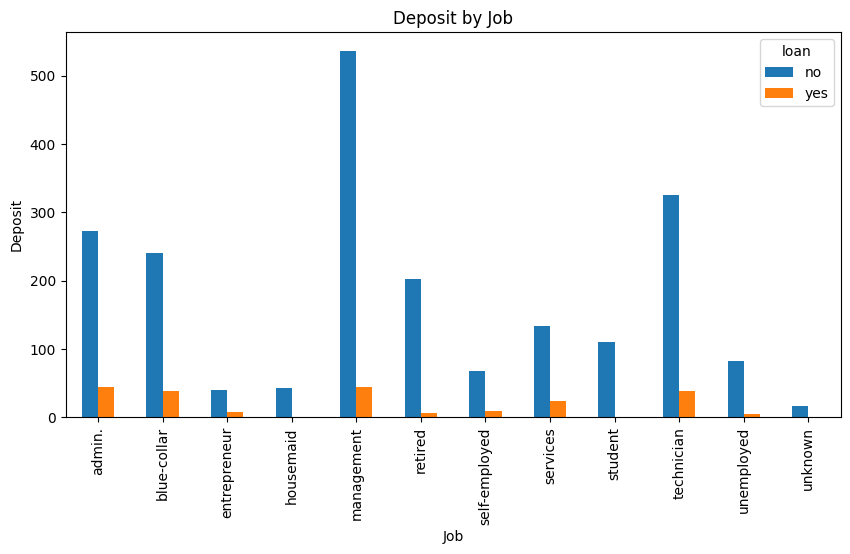

In [22]:
df.groupby(["job"])['loan'].value_counts().unstack().plot(kind='bar',figsize=(10,5))
plt.title("Deposit by Job")
plt.xlabel("Job")
plt.ylabel("Deposit")
plt.show()

In [23]:
df["housing"].value_counts()

housing
no     1276
yes    1011
Name: count, dtype: int64

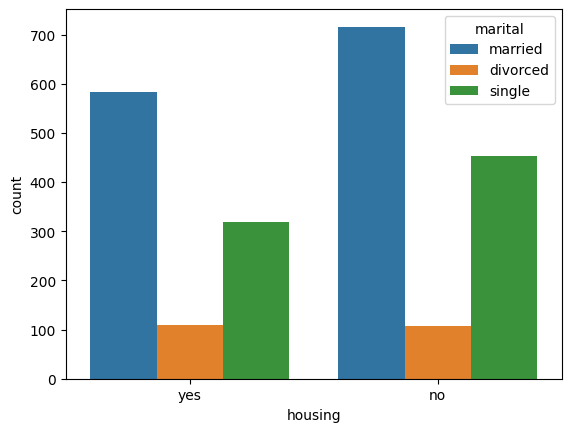

In [24]:
sns.countplot(x="housing",data=df,hue="marital")
plt.show()

In [25]:
df["contact"].value_counts()

contact
cellular     2123
telephone     164
Name: count, dtype: int64

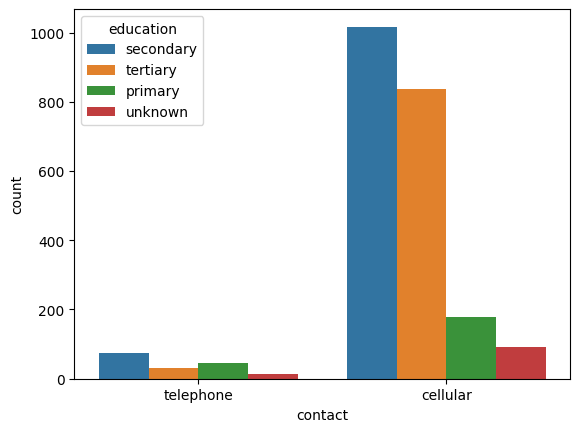

In [26]:
sns.countplot(x="contact",data=df,hue="education")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


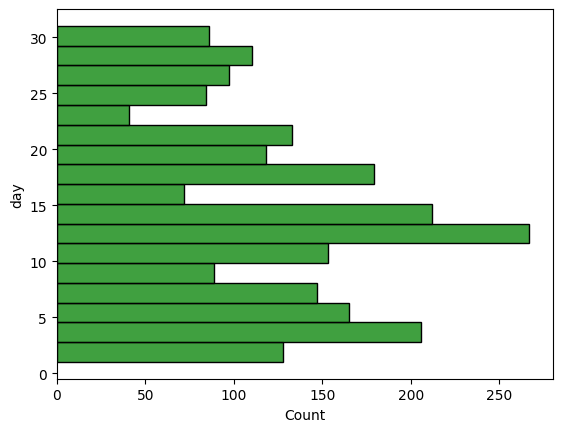

In [27]:
sns.histplot(data=df, y="day",color="green")
plt.show()

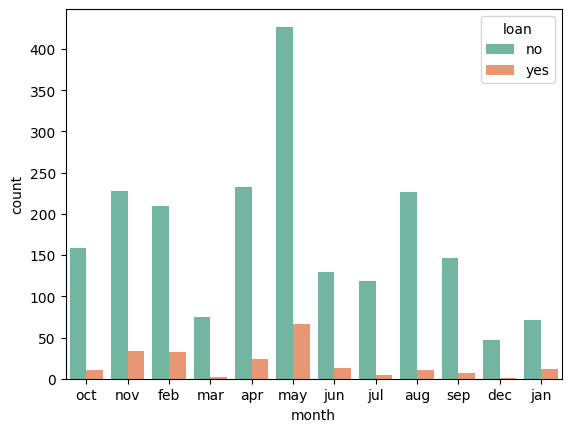

In [28]:
sns.countplot(x="month",data=df,hue="loan",palette="Set2")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

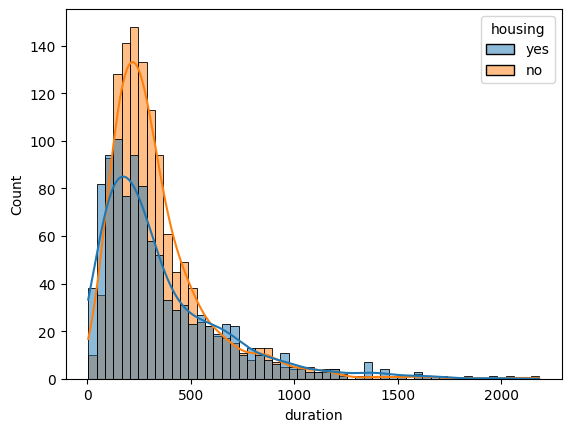

In [29]:
sns.histplot(data=df, x="duration",color="crimson",hue="housing",kde=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

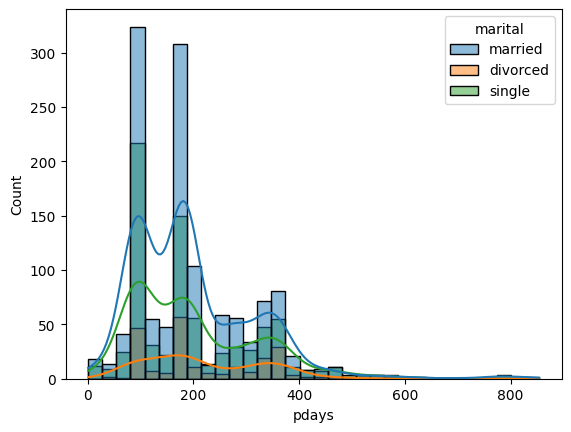

In [30]:
sns.histplot(data=df, x="pdays",color="navy",hue="marital",kde=True)
plt.show()

In [31]:
df["poutcome"].value_counts()

poutcome
failure    1222
success    1065
Name: count, dtype: int64

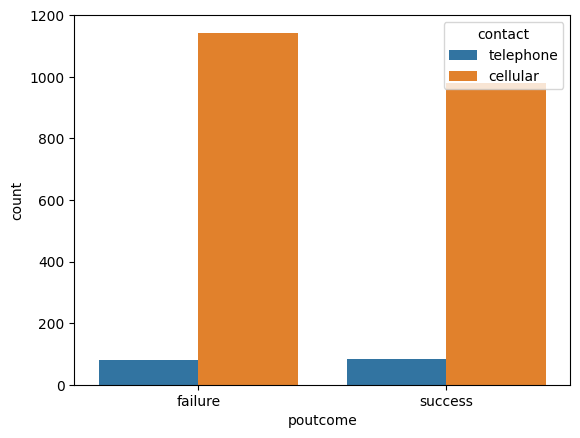

In [32]:
sns.countplot(x="poutcome",data=df,hue="contact")
plt.show()

In [33]:
df["deposit"].value_counts()

deposit
yes    1589
no      698
Name: count, dtype: int64

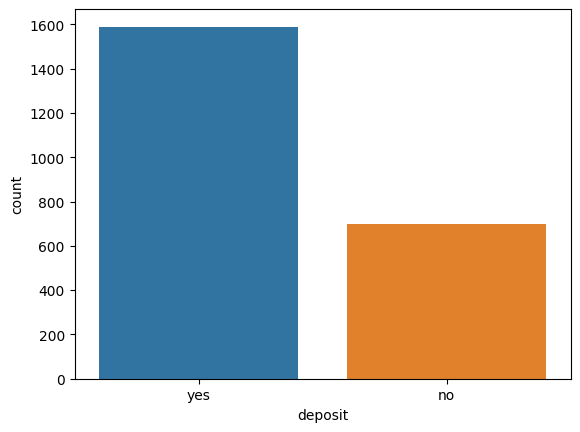

In [34]:
sns.countplot(x="deposit",data=df)
plt.show()

In [35]:
cat_data=["job","marital","education","default","housing","loan","contact","month","poutcome"]
from sklearn.preprocessing import LabelEncoder
cat_data = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]


l = LabelEncoder()


for column in cat_data:
    df[column] = l.fit_transform(df[column])
df["deposit"]=df["deposit"].replace({"yes":1,"no":0})

/tmp/ipykernel_67/3122618810.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["deposit"]=df["deposit"].replace({"yes":1,"no":0})


In [36]:
col=["age","balance","day","month","duration","pdays"]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

df[col]=sc.fit_transform(df[col])

In [37]:
X=df.drop(columns="deposit",axis=1)
y=df["deposit"]

In [38]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# DecisionTree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_auc_score, roc_curve

model= DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8056768558951966


# confusion matrix

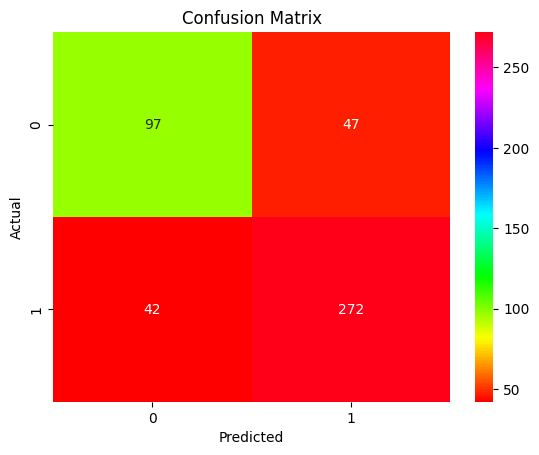

In [40]:
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt="d",cmap="hsv")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# classification report

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       144
           1       0.85      0.87      0.86       314

    accuracy                           0.81       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.80      0.81      0.80       458



# Roc auc score

In [42]:
roc_auc = roc_auc_score(y_test,y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7699265746638358


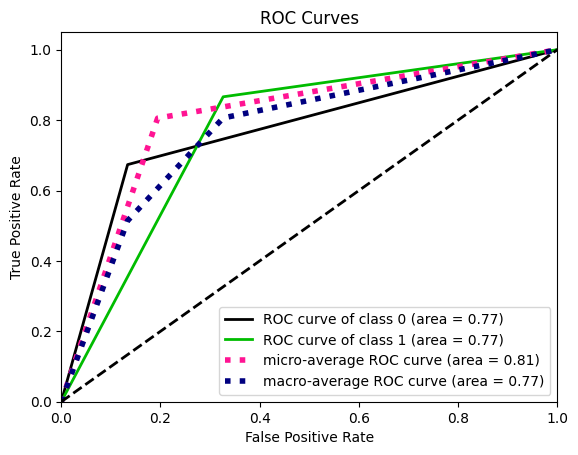

In [43]:
import scikitplot as skplt


y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()